## Simple Deepfake detector Trained on VGG16 <br>
Data : "https://cainvas-static.s3.amazonaws.com/media/user_data/cainvas-admin/realVSfake.zip"

In [15]:
import numpy as np
import pandas as pd
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Dense,BatchNormalization, Flatten, MaxPool2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, Callback
from tensorflow.keras.layers import Conv2D, Reshape
from tensorflow.keras.utils import Sequence
from tensorflow.keras.backend import epsilon
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Convolution2D, Conv2D, MaxPooling2D, GlobalAveragePooling2D
import cv2


from tqdm.notebook import tqdm_notebook as tqdm

import os

In [13]:
from keras.layers.convolutional import Conv2D

In [3]:
print(os.listdir("realVSfake/real_and_fake_face"))

['training_fake', 'training_real']


In [4]:
real = "realVSfake/real_and_fake_face/training_real/"
fake = "realVSfake/real_and_fake_face/training_fake/"

real_path = os.listdir(real)
fake_path = os.listdir(fake)

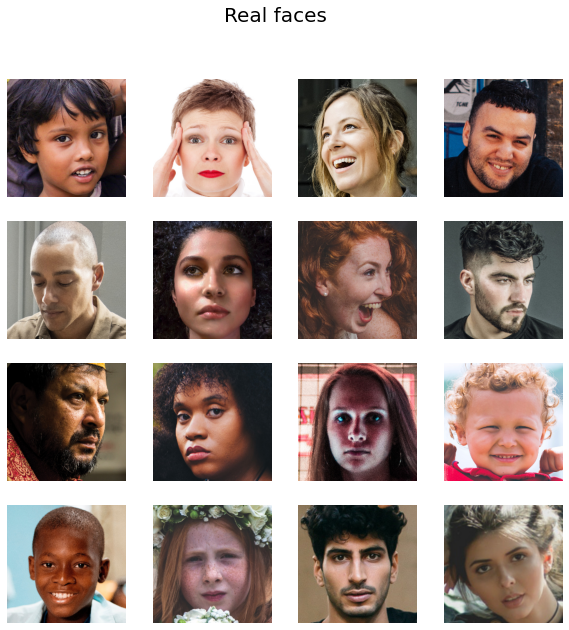

In [5]:
def load_img(path):
    image = cv2.imread(path)
    image = cv2.resize(image,(224, 224))
    return image[...,::-1]
fig = plt.figure(figsize=(10, 10))

for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(load_img(real + real_path[i]), cmap='gray')
    plt.suptitle("Real faces",fontsize=20)
    plt.axis('off')

plt.show()

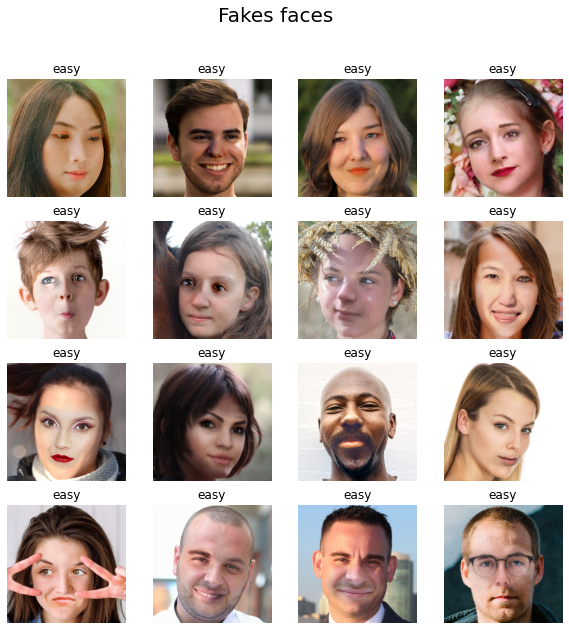

In [6]:
fig = plt.figure(figsize=(10,10))

for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(load_img(fake + fake_path[i]), cmap='gray')
    plt.suptitle("Fakes faces",fontsize=20)
    plt.title(fake_path[i][:4])
    plt.axis('off')

plt.show()

In [7]:
dataset_path = "realVSfake/real_and_fake_face"

## Data augumentation and Data Loader

In [10]:
data_with_aug = ImageDataGenerator(horizontal_flip=True,
                                   vertical_flip=False,
                                   rescale=1./255,
                                  validation_split=0.2)
val = data_with_aug.flow_from_directory(dataset_path,
                                          class_mode="binary",
                                          target_size=(224, 224),
                                          batch_size=32,
                                          subset="validation"
                                          )
train = data_with_aug.flow_from_directory(dataset_path,
                                          class_mode="binary",
                                          target_size=(224, 224),
                                          batch_size=32)

Found 166 images belonging to 2 classes.
Found 832 images belonging to 2 classes.


## Building VGG Model

In [16]:
vgg_model = Sequential()
vgg_model.add(Conv2D(filters=64, kernel_size=1, input_shape=(224, 224, 3), activation='relu'))
vgg_model.add(Conv2D(filters=64, kernel_size=1, activation='relu'))
vgg_model.add(MaxPooling2D(pool_size=2))
vgg_model.add(Dropout(0.2))

vgg_model.add(Conv2D(filters=128, kernel_size=1, activation='relu'))
vgg_model.add(Conv2D(filters=128, kernel_size=1, activation='relu'))
vgg_model.add(MaxPooling2D(pool_size=2))
vgg_model.add(Dropout(0.2))

vgg_model.add(Conv2D(filters=256, kernel_size=1, activation='relu'))
vgg_model.add(Conv2D(filters=256, kernel_size=1, activation='relu'))
vgg_model.add(Conv2D(filters=256, kernel_size=1, activation='relu'))
vgg_model.add(MaxPooling2D(pool_size=2))
vgg_model.add(Dropout(0.2))

vgg_model.add(Conv2D(filters=512, kernel_size=1, activation='relu'))
vgg_model.add(Conv2D(filters=512, kernel_size=1, activation='relu'))
vgg_model.add(Conv2D(filters=512, kernel_size=1, activation='relu'))
vgg_model.add(MaxPooling2D(pool_size=2))
vgg_model.add(Dropout(0.2))

vgg_model.add(Conv2D(filters=512, kernel_size=1, activation='relu'))
vgg_model.add(Conv2D(filters=512, kernel_size=1, activation='relu'))
vgg_model.add(Conv2D(filters=512, kernel_size=1, activation='relu'))
vgg_model.add(MaxPooling2D(pool_size=2))
vgg_model.add(Dropout(0.2))

vgg_model.add(Flatten())
vgg_model.add(Dense(256, activation='relu'))
vgg_model.add(Dense(128, activation='relu'))
vgg_model.add(Dense(2, activation='softmax'))

vgg_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 64)      256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      4160      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
dropout (Dropout)            (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 128)     8320      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 128)     16512     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 128)      

In [18]:
vgg_model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = vgg_model.fit(train,
                    epochs=10                        
                    )

  ...
    to  
  ['...']
Train for 26 steps
Epoch 1/10
26/26 [==============================] - 30s 1s/step - loss: 0.6902 - accuracy: 0.5457
Epoch 2/10
26/26 [==============================] - 13s 488ms/step - loss: 0.6822 - accuracy: 0.5769
Epoch 3/10
26/26 [==============================] - 13s 491ms/step - loss: 0.6820 - accuracy: 0.5769
Epoch 4/10
26/26 [==============================] - 13s 494ms/step - loss: 0.6831 - accuracy: 0.5769
Epoch 5/10
26/26 [==============================] - 13s 499ms/step - loss: 0.6826 - accuracy: 0.5769
Epoch 6/10
26/26 [==============================] - 14s 557ms/step - loss: 0.6826 - accuracy: 0.5769
Epoch 7/10
26/26 [==============================] - 15s 570ms/step - loss: 0.6830 - accuracy: 0.5769
Epoch 8/10
26/26 [==============================] - 15s 565ms/step - loss: 0.6827 - accuracy: 0.5769
Epoch 9/10
26/26 [==============================] - 15s 560ms/step - loss: 0.6822 - accuracy: 0.5769
Epoch 10/10
26/26 [==============================]

In [19]:
vgg_model.save("real_vs_fake.h5")

In [20]:
vgg16_model = tf.keras.applications.vgg16.VGG16(include_top=False, weights="imagenet", input_shape=(224,224,3))

58892288/58889256 [==============================] - 16s 0us/step


In [21]:
vgg16_model.output[-1]

<tf.Tensor 'strided_slice:0' shape=(7, 7, 512) dtype=float32>

In [23]:
model = Sequential([vgg16_model,
                     GlobalAveragePooling2D(),
                     Dense(512, activation = "relu"),
                     BatchNormalization(),
                     Dense(128, activation = "relu"),
 
                     Dense(2, activation = "softmax")])
# We will be training only our dense layers not the entire VGG16 model
model.layers[0].trainable = False

model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 512)               262656    
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
dense_7 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_8 (Dense)              (None, 2)                 258       
Total params: 15,045,314
Trainable params: 329,602
Non-trainable params: 14,715,712
____________________________________

In [24]:
history =  model.fit(train,
                    epochs=15
                    )

  ...
    to  
  ['...']
Train for 26 steps
Epoch 1/15
26/26 [==============================] - 15s 583ms/step - loss: 0.7924 - accuracy: 0.5577
Epoch 2/15
26/26 [==============================] - 13s 483ms/step - loss: 0.5224 - accuracy: 0.7404
Epoch 3/15
26/26 [==============================] - 12s 480ms/step - loss: 0.4377 - accuracy: 0.8065
Epoch 4/15
26/26 [==============================] - 13s 487ms/step - loss: 0.3380 - accuracy: 0.8882
Epoch 5/15
26/26 [==============================] - 15s 592ms/step - loss: 0.2699 - accuracy: 0.9099
Epoch 6/15
26/26 [==============================] - 15s 590ms/step - loss: 0.2233 - accuracy: 0.9447
Epoch 7/15
26/26 [==============================] - 15s 571ms/step - loss: 0.1707 - accuracy: 0.9748
Epoch 8/15
26/26 [==============================] - 16s 605ms/step - loss: 0.1415 - accuracy: 0.9760
Epoch 9/15
26/26 [==============================] - 14s 556ms/step - loss: 0.1049 - accuracy: 0.9832
Epoch 10/15
26/26 [============================

In [25]:
predictions = model.predict(val)
scores = model.evaluate(val, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

  ...
    to  
  ['...']
6/6 [==============================] - 3s 455ms/step - loss: 0.3435 - accuracy: 0.8072
Test loss: 0.3435240834951401
Test accuracy: 0.8072289
